In [1]:
%pip install opencv-python
%pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:


%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
# machine learning model using Neural Network
# CNN model for covid-19 x-ray images

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
import cv2
import random
import time
import sys
import json


# load training data of covid-19 x-ray images for normal and pneumonia

def load_data(data_dir):
    data = []
    for label in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(data_dir, label)
        class_num = ['NORMAL', 'PNEUMONIA'].index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (100, 100))
                data.append([new_array, class_num])
            except Exception as e:
                pass
    return data




2024-05-15 07:31:28.955734: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 07:31:28.959132: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 07:31:28.999617: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 07:31:30.123931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# load data
data_dir = 'Healthcare/train'
data = load_data(data_dir)
random.shuffle(data)


In [5]:
# machine learning model using Neural Network
# CNN model for covid-19 x-ray images

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
import cv2
import random
import time
import sys
import json


# load training data of covid-19 x-ray images for normal and pneumonia

def load_data(data_dir):
    data = []
    for label in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(data_dir, label)
        class_num = ['NORMAL', 'PNEUMONIA'].index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (100, 100))
                data.append([new_array, class_num])
            except Exception as e:
                pass
    return data




In [6]:
# split data into training and testing
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]


In [7]:
# split data into x and y
x_train = []
y_train = []
x_test = []
y_test = []

for features, label in train:
    x_train.append(features)
    y_train.append(label)

for features, label in test:
    x_test.append(features)
    y_test.append(label)

# reshape data
x_train = np.array(x_train).reshape(-1, 100, 100, 1)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 100, 100, 1)
y_test = np.array(y_test)


In [8]:
# normalize data
x_train = x_train/255.0
x_test = x_test/255.0

# build model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,371,522 (16.68 MB)

 Trainable params: 4,371,522 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# predict model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


2024-05-15 07:32:45.008130: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2024-05-15 07:32:45.542659: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30537216 exceeds 10% of free system memory.
2024-05-15 07:32:45.692913: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39337984 exceeds 10% of free system memory.
2024-05-15 07:32:45.693030: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


1/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5938 - loss: 0.6847

2024-05-15 07:32:45.876046: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.5620 - loss: 0.7871 - val_accuracy: 0.5667 - val_loss: 0.6373
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.5008 - loss: 0.6502 - val_accuracy: 0.9333 - val_loss: 0.5876
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 0.8822 - loss: 0.5486 - val_accuracy: 0.9333 - val_loss: 0.3833
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.8804 - loss: 0.3703 - val_accuracy: 0.8667 - val_loss: 0.3048
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.8984 - loss: 0.2464 - val_accuracy: 1.0000 - val_loss: 0.1353
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.9726 - loss: 0.1359 - val_accuracy: 0.9000 - val_loss: 0.1662
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.9317 - loss: 0.1622 - val_accuracy: 0.9333 - val_loss: 0.1220
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.9891 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 0.0414
Epo

In [12]:
# print the prediction
prediction = model.predict(x_test)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[[9.67258215e-01 3.27417590e-02]
 [9.99879420e-01 1.20550860e-04]
 [1.22576486e-04 9.99877453e-01]
 [9.99418855e-01 5.81121596e-04]
 [3.21235880e-02 9.67876315e-01]
 [9.09376796e-03 9.90906179e-01]
 [9.90922272e-01 9.07771289e-03]
 [7.33392954e-01 2.66607016e-01]
 [2.01159506e-03 9.97988462e-01]
 [8.87024283e-01 1.12975694e-01]
 [3.59739102e-02 9.64026034e-01]
 [6.27209607e-04 9.99372721e-01]
 [3.96231102e-04 9.99603689e-01]
 [3.80231291e-02 9.61976945e-01]
 [9.99933660e-01 6.63229803e-05]
 [9.99976456e-01 2.34520721e-05]
 [1.59931630e-02 9.84006882e-01]
 [1.50378346e-02 9.84962225e-01]
 [9.99895394e-01 1.04544677e-04]
 [3.13365995e-03 9.96866226e-01]
 [9.99579608e-01 4.20421100e-04]
 [9.99975860e-01 2.40225909e-05]
 [9.99999583e-01 3.43596099e-07]
 [9.99983490e-01 1.64898538e-05]
 [9.99994278e-01 5.70298380e-06]
 [9.97868896e-01 2.13104649e-03]
 [2.88701858e-02 9.71129835e-01]
 [9.48163450e-01 5.18365353e-02]
 [8.07399824e-02 9.19260025e-01]
 [9.

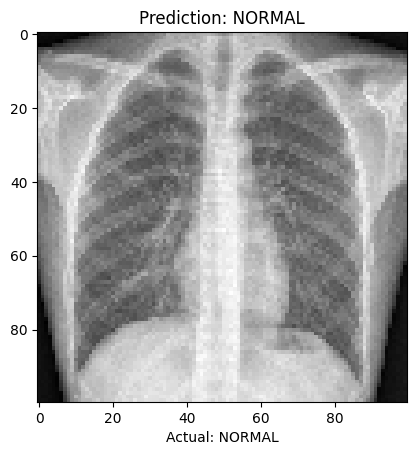

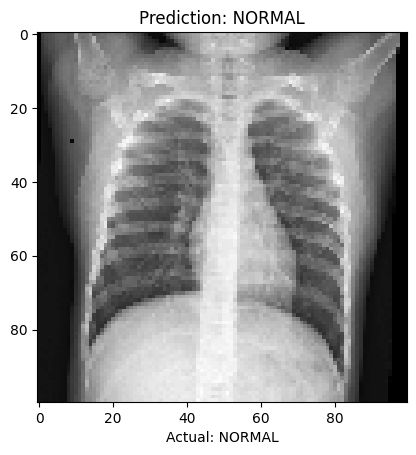

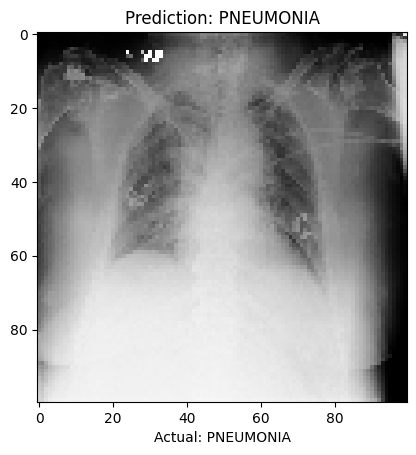

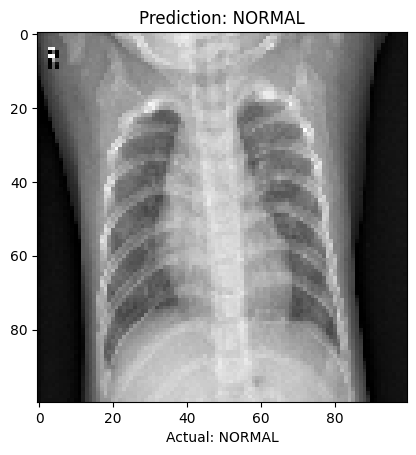

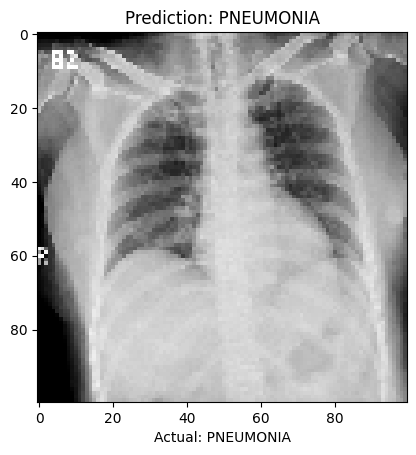

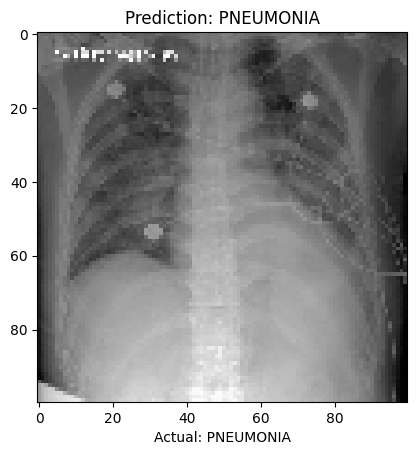

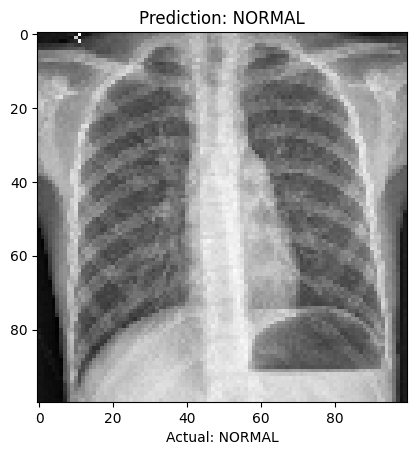

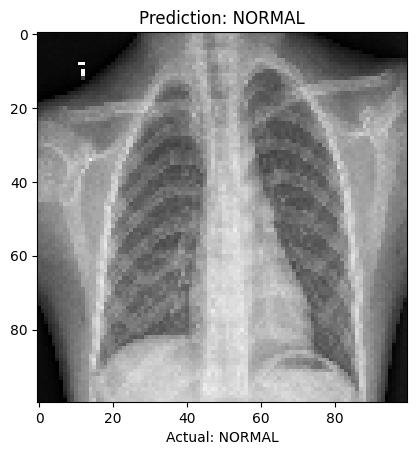

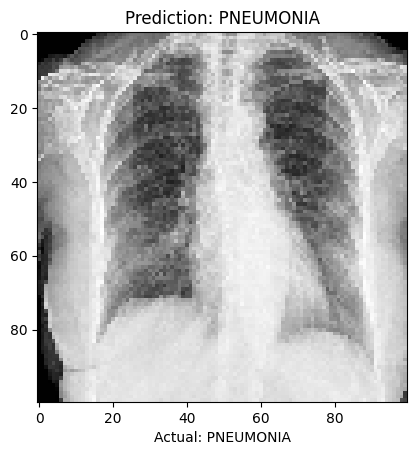

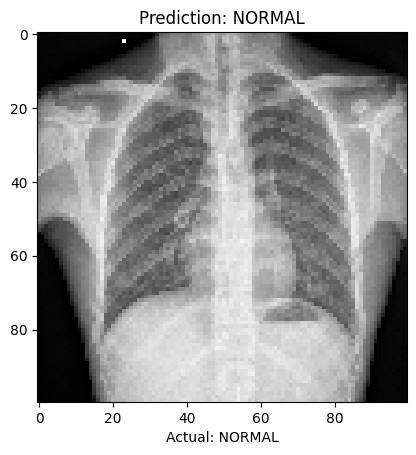

In [13]:
# plot the prediction result
for i in range(10):
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel('Actual: ' + ['NORMAL', 'PNEUMONIA'][y_test[i]])
    plt.title('Prediction: ' + ['NORMAL', 'PNEUMONIA'][np.argmax(prediction[i])])
    plt.show()



In [14]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0266
Test accuracy: 1.0


In [16]:
# test the model using test directory
test_dir = 'Healthcare/test'
test_data = load_data(test_dir)
random.shuffle(test_data)

x_test = []
y_test = []

for features, label in test_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, 100, 100, 1)
y_test = np.array(y_test)

x_test = x_test/255.0

prediction = model.predict(x_test)
print(prediction)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 
[[9.9991947e-01 8.0401966e-05]
 [9.8224932e-01 1.7750600e-02]
 [9.9969661e-01 3.0331267e-04]
 [9.9998206e-01 1.7921200e-05]
 [9.9619320e-03 9.9003804e-01]
 [1.4240695e-03 9.9857593e-01]
 [2.6889822e-02 9.7311014e-01]
 [4.3444401e-03 9.9565554e-01]
 [4.0307702e-03 9.9596930e-01]
 [9.0904951e-01 9.0950474e-02]
 [1.4620836e-02 9.8537916e-01]
 [9.7044128e-01 2.9558672e-02]
 [9.9872530e-01 1.2746711e-03]
 [9.9938428e-01 6.1568042e-04]
 [7.1863891e-05 9.9992806e-01]
 [9.9911052e-01 8.8946451e-04]
 [2.5013785e-04 9.9974978e-01]
 [5.5376795e-04 9.9944621e-01]
 [9.9102753e-01 8.9724232e-03]
 [1.1839324e-02 9.8816073e-01]
 [9.9990648e-01 9.3417846e-05]
 [9.8358428e-01 1.6415717e-02]
 [2.3353808e-01 7.6646191e-01]
 [1.7344993e-01 8.2655007e-01]
 [2.1837635e-03 9.9781621e-01]
 [9.9999183e-01 8.0762566e-06]
 [9.9960464e-01 3.9534597e-04]
 [9.9957508e-01 4.2490140e-04]
 [9.9999875e-01 1.1821683e-06]
 [9.9971688e-01 2.8303207e-04]
 [2.5166462e-03 9.9748343e-01]


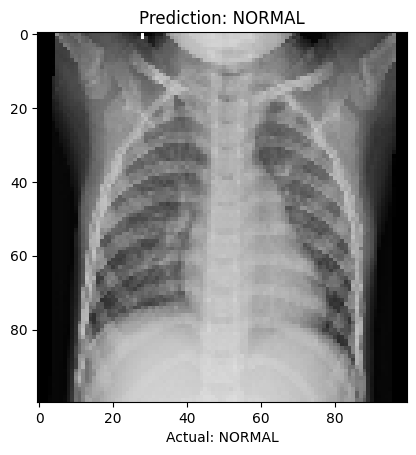

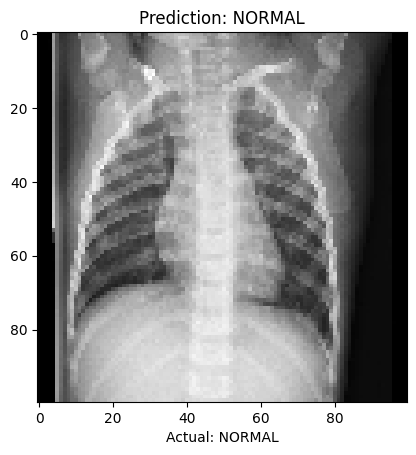

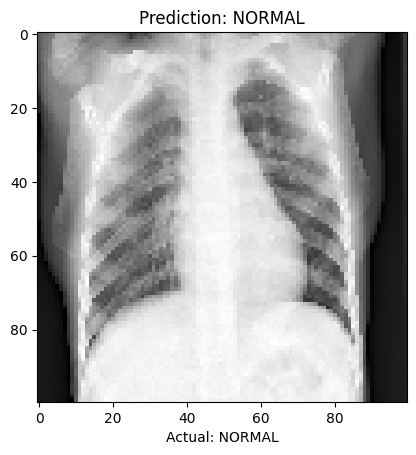

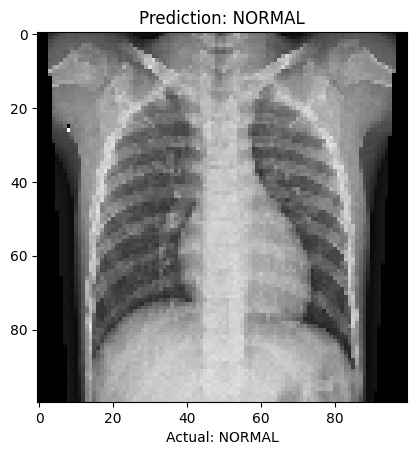

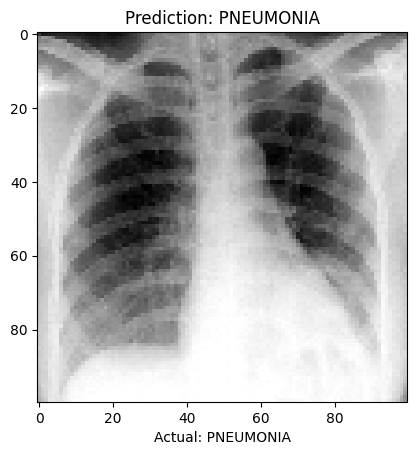

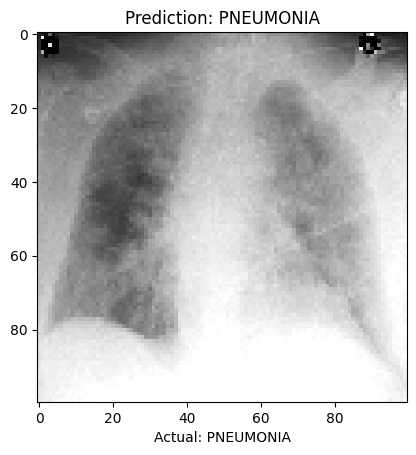

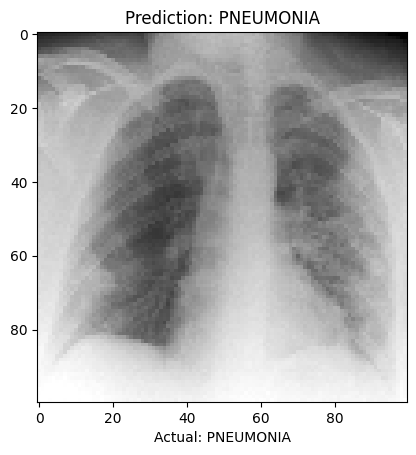

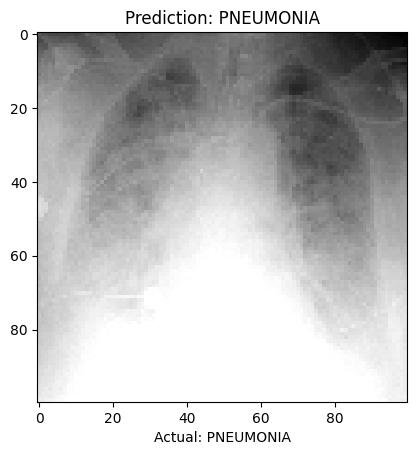

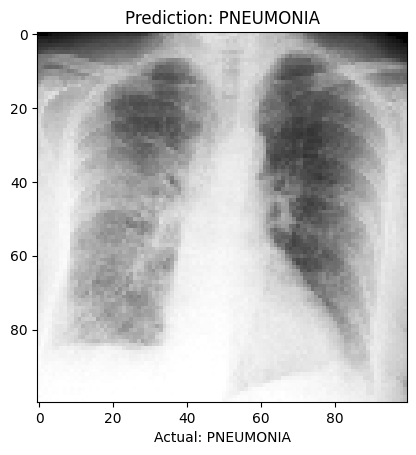

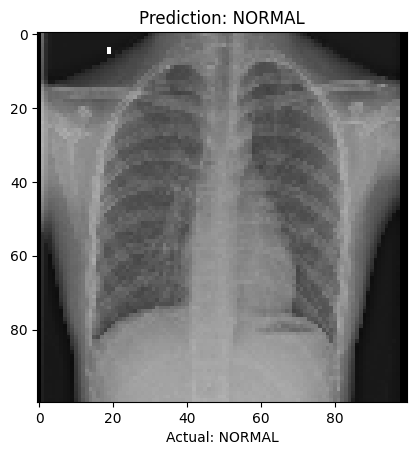

In [17]:
# plot the prediction result
for i in range(10):
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel('Actual: ' + ['NORMAL', 'PNEUMONIA'][y_test[i]])
    plt.title('Prediction: ' + ['NORMAL', 'PNEUMONIA'][np.argmax(prediction[i])])
    plt.show()

    

In [18]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0218 
Test accuracy: 1.0


In [19]:
# save the model
model.save('covid19_cnn.model')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=covid19_cnn.model.